In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('data_clustering.csv')
data.head()

,K&A,DD,AoW,AoM,DV,WT,Cluster
0,0.003576,0.000000,0.005251,0.000318,0.000473,0.0,0
1,0.069566,0.023376,0.057227,0.000425,0.053613,0.0,0
2,0.011118,0.027734,0.118697,0.017088,0.036086,0.0,0
3,0.000390,0.000792,0.001145,0.000743,0.000473,0.0,0
4,0.055718,0.026545,0.050899,0.011781,0.157531,0.0,0


In [ ]:
print("\n Information dataset:")
data.info()
print("\n Missing values per column:")
print(data.isnull().sum())


 Information dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   K&A      507 non-null    float64
 1   DD       507 non-null    float64
 2   AoW      507 non-null    float64
 3   AoM      507 non-null    float64
 4   DV       507 non-null    float64
 5   WT       507 non-null    float64
 6   Cluster  507 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.9 KB

 Missing values per column:
K&A        0
DD         0
AoW        0
AoM        0
DV         0
WT         0
Cluster    0
dtype: int64


In [ ]:
data = data.drop(columns=['Cluster', 'AoW', 'DV', 'WT'])

In [ ]:
#data  split
scaler = MinMaxScaler()
threshold1 = 0.5
threshold2 = 0.75
#Normalize all numeric column
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

#Separate feature (X) and target (y)
X = data.drop(columns=['DD'])
y = data['DD']

# Split data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Convert Continuous Data to Discrete
y_train = np.where(y_train < threshold1, 0, np.where(y_train < threshold2, 1, 2))
y_test = np.where(y_test < threshold1, 0, np.where(y_test < threshold2, 1, 2))

#Show the shape of the training set and test set to ensure the split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(405, 2), y_train=(405,)
Test set shape: X_test=(102, 2), y_test=(102,)


In [ ]:
# Part 1: Model Training
# Define each classification separately
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
print("Model training finished.")

Model training finished.


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Evaluate each model and print F1 scores
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# DataFrame Ratio with Results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert dictionary lists to DataFrames
summary_df = pd.DataFrame(rows)

#Display DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.921569   0.908173  0.921569  0.891323
1            Decision Tree (DT)  0.833333   0.869120  0.833333  0.850779
2            Random Forest (RF)  0.921569   0.901694  0.921569  0.905800
3  Support Vector Machine (SVM)  0.911765   0.831315  0.911765  0.869683
4              Naive Bayes (NB)  0.882353   0.828877  0.882353  0.854779


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for K-Nearest Neighbors (KNN):


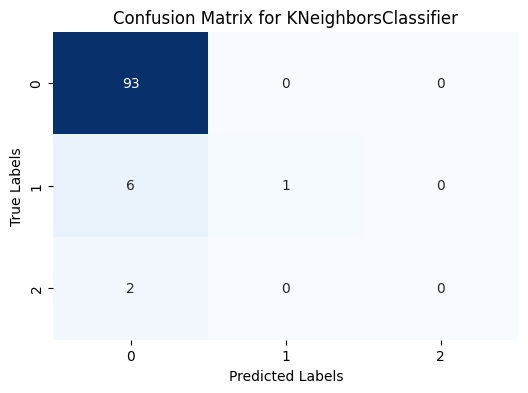

Confusion Matrix for Decision Tree (DT):


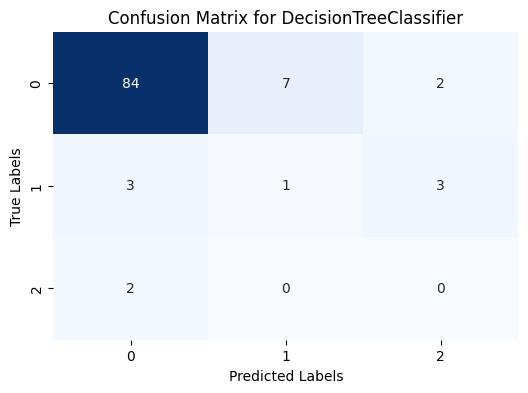

Confusion Matrix for Random Forest (RF):


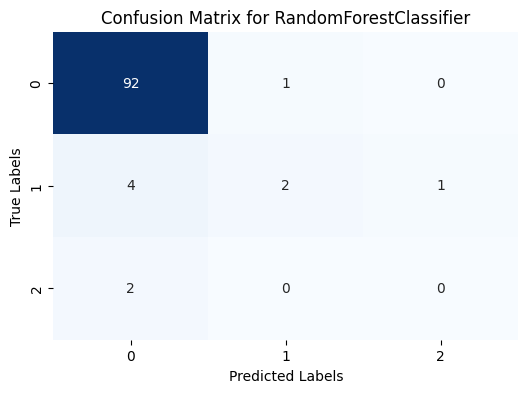

Confusion Matrix for Support Vector Machine (SVM):


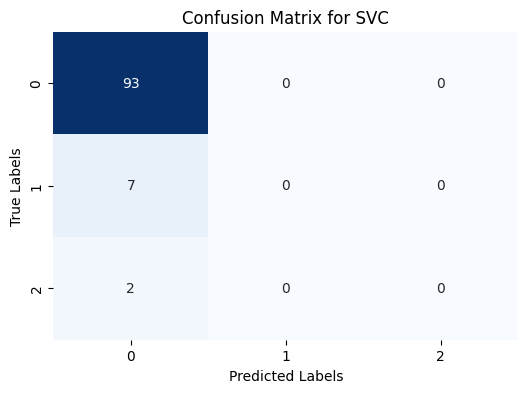

Confusion Matrix for Naive Bayes (NB):


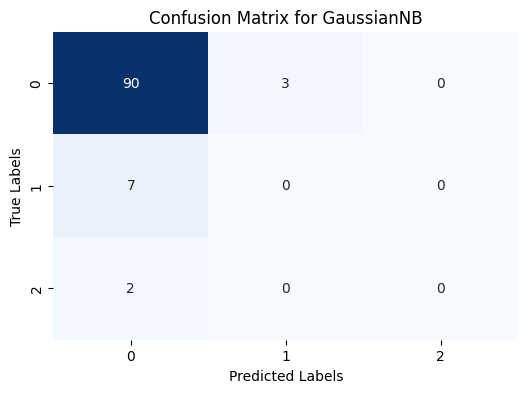

In [ ]:
# Function to evaluate model and display confusion matrix
def evaluate_model_with_confusion(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate each model and display confusion matrices
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}

for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    evaluate_model_with_confusion(model, X_test, y_test)

In [ ]:
# Define search space for Bayesian Optimization
param_space_knn = {
    'n_neighbors': (1, 5),              # Number of neighbors to consider
    'weights': ['distance', 'uniform'],  # Weight function used in prediction
    'metric': ['minkowski', 'manhattan', 'euclidean']  # Distance metric
}

# BayesSearchCV Initialization
knn = KNeighborsClassifier()
bayes_search_knn = BayesSearchCV(estimator=knn, search_spaces=param_space_knn, n_iter=24, cv=6, n_jobs=-1, verbose=3, random_state=24)
bayes_search_knn.fit(X_train, y_train)

# Best yield output
print(f"Best parameters (Bayesian Optimization for KNN): {bayes_search_knn.best_params_}")
best_knn_bayes = bayes_search_knn.best_estimator_

# Evaluate the performance of the model on the test set
knn_bayes_search_score = best_knn_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization (KNN): {knn_bayes_search_score:.2f}")

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

In [ ]:
# Output the best parameters and best estimator
print(f"Best parameters (Bayesian Optimization for KNN): {bayes_search_knn.best_params_}")
best_knn_bayes = bayes_search_knn.best_estimator_

# Evaluate the optimized KNN model on the test set
knn_bayes_search_score = best_knn_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization (KNN): {knn_bayes_search_score:.2f}")

Best parameters (Bayesian Optimization for KNN): OrderedDict([('metric', 'euclidean'), ('n_neighbors', 4), ('weights', 'uniform')])
Accuracy after Bayesian Optimization (KNN): 0.93


In [ ]:
# Evaluate each model and print F1 scores
results = {
    'K-Nearest Neighbors (KNN) Tuned': evaluate_model(bayes_search_knn, X_test, y_test),
}

summary_df = pd.DataFrame(rows)

print("Model Accuracy After Tuning")
print(summary_df)

Model Accuracy After Tuning
                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.921569   0.908173  0.921569  0.891323
1            Decision Tree (DT)  0.833333   0.869120  0.833333  0.850779
2            Random Forest (RF)  0.921569   0.901694  0.921569  0.905800
3  Support Vector Machine (SVM)  0.911765   0.831315  0.911765  0.869683
4              Naive Bayes (NB)  0.882353   0.828877  0.882353  0.854779


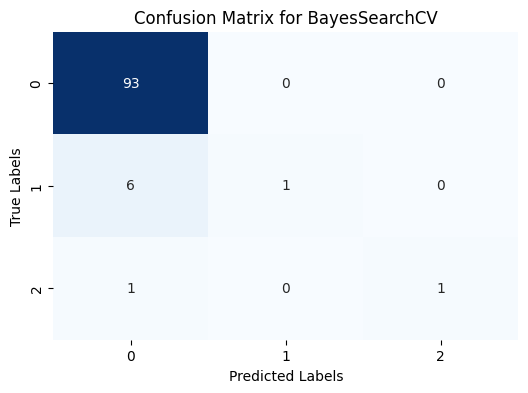

In [ ]:
evaluate_model_with_confusion(bayes_search_knn, X_test, y_test)
